# Time Series Analysis Examples
In this notebook we will be transforming and exploring time-series data from Onboard API. Make sure to run the following chunk of code first in order to install it.

How to query time-series from data points, process and visually explore them. This notebook is outlined in several YouTube videos that discuss:
- how [to load and filter time-series data](https://youtu.be/KDThdyes8kc) from sensors
- [resample and transform time-series data](https://youtu.be/VlQNGwiSSKM)
- and [create heat maps and boxplots of data](https://youtu.be/QMr0y9LOlr8) for exploration

In [11]:
import pandas as pd
from onboard.client import RtemClient

# Create the client

For this notebook, you need to use the API Key with acces to the general scope and building:read scope. Let's create the client:

In [12]:
api_key = 'ob-p-_KnPccpVFOwKvS5u_SpKixHjKKq6H1JvrzwjxISOfPiNKKZ56_EeE5ORVJOGGtx0d_k'

In [13]:
client = RtemClient(api_key=api_key)

# Load & filter data

We will be using the metadata file we obtained from Onboard API in the previous notebook. Of course you can query these points again, but let's learn how to load and filter the data using *pandas*:

In [14]:
metadata = pd.read_csv("./rtem_all_points_metadata.csv")

Let's check the data types:

In [15]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44390 entries, 0 to 44389
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_point          44390 non-null  int64  
 1   building_id       44390 non-null  int64  
 2   last_updated      44342 non-null  float64
 3   first_updated     44342 non-null  float64
 4   device            0 non-null      float64
 5   objectId          0 non-null      float64
 6   name_point        14658 non-null  object 
 7   description       31843 non-null  object 
 8   units             31687 non-null  object 
 9   tagged_units      14654 non-null  object 
 10  raw_unit_id       44390 non-null  int64  
 11  value             44274 non-null  object 
 12  type              44390 non-null  object 
 13  point_type_id     44390 non-null  int64  
 14  measurement_id    44390 non-null  int64  
 15  datasource_hash   44390 non-null  object 
 16  topic             44390 non-null  object

In [16]:
metadata.head()

,id_point,building_id,last_updated,first_updated,device,objectId,name_point,description,units,tagged_units,...,measurement_id,datasource_hash,topic,equip_id,id_bdg,name_bdg,equip_type_abbr,equip_type_name,area_served_desc,tags
0,310029,441,1.560571e+12,1.550542e+12,NaN,NaN,245 E 149th St. Boiler-1 Fault Code,NaN,?,?,...,18,b115b5053493748f7076ad09f69c4456,nyserda+0000088737+boiler-1+245 E 149th St. Bo...,28797,441,88737,BLR,Boiler,NaN,"['boiler', 'hvac']"
1,310009,441,1.560485e+12,1.550701e+12,NaN,NaN,225 E 149th St. Boiler-1 Exhaust Temp,NaN,F,f,...,1,4a1a11502acee3078352da312c40c262,nyserda+0000088737+boiler-1+225 E 149th St. Bo...,28797,441,88737,BLR,Boiler,NaN,"['boiler', 'hvac']"
2,310010,441,1.560571e+12,1.550504e+12,NaN,NaN,225 E 149th St. Boiler-1 Fault Code,NaN,?,?,...,18,55882633fe8fb5aac7dac643c99b1af5,nyserda+0000088737+boiler-1+225 E 149th St. Bo...,28797,441,88737,BLR,Boiler,NaN,"['boiler', 'hvac']"
3,310011,441,1.560485e+12,1.550504e+12,NaN,NaN,225 E 149th St. Boiler-1 FFWD Temp,NaN,?,?,...,18,831a8df09b848f53e807fa0204c45eaa,nyserda+0000088737+boiler-1+225 E 149th St. Bo...,28797,441,88737,BLR,Boiler,NaN,"['boiler', 'hvac']"
4,310012,441,1.560485e+12,1.550504e+12,NaN,NaN,225 E 149th St. Boiler-1 Fire Rate In,NaN,?,?,...,18,aa147c829c7ed55b6e93cdbbb8b43d55,nyserda+0000088737+boiler-1+225 E 149th St. Bo...,28797,441,88737,BLR,Boiler,NaN,"['boiler', 'hvac']"


We have a lot of points here:

In [17]:
len(metadata.id_point)

44390

Let's filter out only the Zone Temperature sensors -that's the `type_id` 77, you can confirm this querying the ontology data, like we did in the previous notebook ;)- and that are Fan Coil Units:

In [18]:
# boiler_data = metadata[(metadata.equip_type_name == "Boiler")]
# pump_data = metadata[(metadata.equip_type_name == "Pump")]
# hws_data = metadata[(metadata.equip_type_name == "Hot Water Plant")]

In [29]:
ahu_data = metadata[(metadata.equip_type_name == "Air Handling Unit")]
ahu_data

,id_point,building_id,last_updated,first_updated,device,objectId,name_point,description,units,tagged_units,...,measurement_id,datasource_hash,topic,equip_id,id_bdg,name_bdg,equip_type_abbr,equip_type_name,area_served_desc,tags
1293,198167,140,1.551416e+12,1.509509e+12,NaN,NaN,NaN,UPCM-1 AH-1 Gallery_Weather Station Name,NaN,NaN,...,18,ab0c5abe378727b4e0eb206fb219e4ea,nyserda+0000083483+ahu1-gallery+UPCM-1 AH-1 Ga...,18092,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1294,198166,140,1.522641e+12,1.509509e+12,NaN,NaN,NaN,UPCM-1 AH-1 Gallery_Weather Station ID,NaN,NaN,...,18,fa9fe494c8c46e83fc0c3b32112f3006,nyserda+0000083483+ahu1-gallery+UPCM-1 AH-1 Ga...,18092,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1295,198164,140,1.551416e+12,1.527826e+12,NaN,NaN,NaN,UPCM-1 AH-1 Gallery_Supply Fan Start/Stop,On/Off,NaN,...,11,c5655766264570e69797288ef99aa6f1,nyserda+0000083483+ahu1-gallery+UPCM-1 AH-1 Ga...,18092,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1296,198165,140,1.551416e+12,1.509509e+12,NaN,NaN,NaN,UPCM-1 AH-1 Gallery_Supply Fan Type,NaN,NaN,...,18,594b4231b1da87402f03f44f61fddc30,nyserda+0000083483+ahu1-gallery+UPCM-1 AH-1 Ga...,18092,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1297,198163,140,1.551416e+12,1.509509e+12,NaN,NaN,NaN,UPCM-1 AH-1 Gallery_Supply Fan Speed Output,%,NaN,...,17,3b48061edf51685f710219f13b2334ee,nyserda+0000083483+ahu1-gallery+UPCM-1 AH-1 Ga...,18092,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44366,231111,398,1.577768e+12,1.571890e+12,NaN,NaN,NaN,CRAC 5-1_Cooling Capacity Status,NaN,NaN,...,18,8797bb8fa41c59d7dc9999e491e0528a,nyserda+0000109188+crac5-1+CRAC 5-1_Cooling Ca...,22747,398,109188,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
44371,231122,399,1.596254e+12,1.543640e+12,NaN,NaN,AC_S1_DAT_status,AC_S1_DAT_status,NaN,?,...,18,d6f824f4b8252746263e6424ec63f015,nyserda+0000097151+ac-fan1-supply+AC_S1_DAT_st...,32352,399,97151,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
44372,231121,399,1.596254e+12,1.527826e+12,NaN,NaN,AC_S1_DAT_value,AC_S1_DAT_value,F,f,...,1,2911795ee7842d6a496d517e3a89a248,nyserda+0000097151+ac-fan1-supply+AC_S1_DAT_value,32352,399,97151,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
44373,231124,399,1.596254e+12,1.543640e+12,NaN,NaN,AC_S2_DAT_status,AC_S2_DAT_status,NaN,?,...,18,e8b69ee26b0115ae34092706995bdb07,nyserda+0000097151+ac-fan2-supply+AC_S2_DAT_st...,32353,399,97151,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"


In [30]:
ahu_mat_data = metadata[(metadata.type == "Mixed Air Temperature")]
ahu_mat_data

,id_point,building_id,last_updated,first_updated,device,objectId,name_point,description,units,tagged_units,...,measurement_id,datasource_hash,topic,equip_id,id_bdg,name_bdg,equip_type_abbr,equip_type_name,area_served_desc,tags
1326,198131,140,1.551416e+12,1.509509e+12,NaN,NaN,NaN,UPCM-1 AH-1 Gallery_Mixed Air Temp,F,NaN,...,1,603cdedfc8c6efd774c2ebe9a62b33a8,nyserda+0000083483+ahu1-gallery+UPCM-1 AH-1 Ga...,18092,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1397,198220,140,1.551416e+12,1.509509e+12,NaN,NaN,NaN,UPCM-2 AH-2 2nd Floor_Mixed Air Temp,F,NaN,...,1,3e9a73baa2a23bb6d2512641a0deda36,nyserda+0000083483+ahu2-floor2+UPCM-2 AH-2 2nd...,18094,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
2213,267505,419,1.567915e+12,1.551967e+12,NaN,NaN,NaN,221 E 71st St Mechanical Room Marymount AHU-1...,F,NaN,...,1,9cb7b76801c0073bedf1d5fea96b8110,nyserda+0000116399+ahu-1+221 E 71st St Mechani...,25962,419,116399,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
2227,267522,419,1.567916e+12,1.551967e+12,NaN,NaN,NaN,221 E 71st St AHU-10 Mixed Air Temp,F,NaN,...,1,273ce8975e94a7567937781e039e695a,nyserda+0000116399+ahu-10+221 E 71st St AHU-10...,25963,419,116399,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
2244,267544,419,1.567916e+12,1.551967e+12,NaN,NaN,NaN,221 E 71st St AHU-2 Mixed Air Temp,F,NaN,...,1,cb3f889c867ebee5f0e305ebe6442dc1,nyserda+0000116399+ahu-2+221 E 71st St AHU-2 M...,25964,419,116399,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43009,230341,394,1.546318e+12,1.514783e+12,NaN,NaN,NaN,HVAC F2 MAT,F,NaN,...,1,762f3ba85b0c7b55c64b964acd8ce7cb,nyserda+0000080880+fan2-supply+HVAC F2 MAT,22674,394,80880,FAN,Fan,NaN,"['fan', 'hvac', 'supplyFan']"
43022,230356,394,1.546318e+12,1.514783e+12,NaN,NaN,NaN,HVAC F20 MATemp,F,NaN,...,1,a6633af055754d6455fa652973507b59,nyserda+0000080880+fan20-supply+HVAC F20 MATemp,22675,394,80880,FAN,Fan,NaN,"['fan', 'hvac', 'supplyFan']"
44243,230969,398,1.577768e+12,1.554845e+12,NaN,NaN,NaN,AC-25-1_MaTmp,F,NaN,...,1,0333f2263b2291bdb6e8d511e8ae47da,nyserda+0000109188+ac25-1+AC-25-1_MaTmp,22734,398,109188,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
44260,231000,398,1.577768e+12,1.554845e+12,NaN,NaN,NaN,AC-4-1_MaTmp,F,NaN,...,1,5bc07319ee8a1f22dec9f34ad698d934,nyserda+0000109188+ac4-1+AC-4-1_MaTmp,22735,398,109188,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"


In [31]:
ahu_sat_data = metadata[(metadata.type == "Supply Air Temperature")]
ahu_sat_data

,id_point,building_id,last_updated,first_updated,device,objectId,name_point,description,units,tagged_units,...,measurement_id,datasource_hash,topic,equip_id,id_bdg,name_bdg,equip_type_abbr,equip_type_name,area_served_desc,tags
1302,198159,140,1.551416e+12,1.518575e+12,NaN,NaN,NaN,UPCM-1 AH-1 Gallery_Supply Air Temp,F,NaN,...,1,987bcb47ca9e78bea7aeca833cecef8b,nyserda+0000083483+ahu1-gallery+UPCM-1 AH-1 Ga...,18092,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1352,198197,140,1.551416e+12,1.509509e+12,NaN,NaN,NaN,AH-1 Lobby_Supply Air Temp,F,NaN,...,1,f399cb123ef54820ca9de858f3fca923,nyserda+0000083483+ahu1-lobby+AH-1 Lobby_Suppl...,18093,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1405,198247,140,1.551416e+12,1.518620e+12,NaN,NaN,NaN,UPCM-2 AH-2 2nd Floor_Supply Air Temp,F,NaN,...,1,4bb044197e0865b5aece28acbfd566d1,nyserda+0000083483+ahu2-floor2+UPCM-2 AH-2 2nd...,18094,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1443,198285,140,1.551416e+12,1.536592e+12,NaN,NaN,NaN,AHU-2-6TH-FLR_Supply Air Temp,F,NaN,...,1,2a80e4185f7b244e78726e0911df7387,nyserda+0000083483+ahu2-floor6+AHU-2-6TH-FLR_S...,18095,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1654,203561,191,1.562119e+12,1.530562e+12,NaN,NaN,NaN,RTU-1 Front Supply,F,NaN,...,1,4b60eff756d5f4fdb378969a106d9bad,nyserda+0000094414+rtu1+RTU-1 Front Supply,18921,191,94414,AHU,Air Handling Unit,NaN,"['ahu', 'hvac', 'rtu']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44318,231071,398,1.577768e+12,1.571890e+12,NaN,NaN,NaN,AHU_27_02_SATmp,F,NaN,...,1,d261378623a38bdc52e1972dc0b408a2,nyserda+0000109188+ahu27-02+AHU_27_02_SATmp,22738,398,109188,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
44354,231104,398,1.577768e+12,1.571890e+12,NaN,NaN,NaN,CRAC-23-1_Discharge Air Temperature,F,NaN,...,1,7e2b7c496f2959369a125070ee443bab,nyserda+0000109188+crac23-1+CRAC-23-1_Discharg...,22746,398,109188,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
44362,231112,398,1.577768e+12,1.571890e+12,NaN,NaN,NaN,CRAC 5-1_Discharge Air Temperature,F,NaN,...,1,afc0b54922060467673b7e2fbb600ed9,nyserda+0000109188+crac5-1+CRAC 5-1_Discharge ...,22747,398,109188,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
44372,231121,399,1.596254e+12,1.527826e+12,NaN,NaN,AC_S1_DAT_value,AC_S1_DAT_value,F,f,...,1,2911795ee7842d6a496d517e3a89a248,nyserda+0000097151+ac-fan1-supply+AC_S1_DAT_value,32352,399,97151,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"


In [34]:
ahu_rat_data = metadata[(metadata.type == "Return Air Temperature")]
ahu_rat_data

,id_point,building_id,last_updated,first_updated,device,objectId,name_point,description,units,tagged_units,...,measurement_id,datasource_hash,topic,equip_id,id_bdg,name_bdg,equip_type_abbr,equip_type_name,area_served_desc,tags
1309,198149,140,1.551416e+12,1.536258e+12,NaN,NaN,NaN,UPCM-1 AH-1 Gallery_Return Air Temp,F,NaN,...,1,29a9514ea653ed9afbc43704e1230efd,nyserda+0000083483+ahu1-gallery+UPCM-1 AH-1 Ga...,18092,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1361,198188,140,1.551416e+12,1.509509e+12,NaN,NaN,NaN,AH-1 Lobby_Return Air Temp,F,NaN,...,1,4d7c35460b418684bd7545239e72876c,nyserda+0000083483+ahu1-lobby+AH-1 Lobby_Retur...,18093,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1382,198237,140,1.551416e+12,1.536258e+12,NaN,NaN,NaN,UPCM-2 AH-2 2nd Floor_Return Air Temp,F,NaN,...,1,6b9e0ebbd36ba727bdeb4437b012b877,nyserda+0000083483+ahu2-floor2+UPCM-2 AH-2 2nd...,18094,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1446,198277,140,1.551416e+12,1.536592e+12,NaN,NaN,NaN,AHU-2-6TH-FLR_Return Air Temp,F,NaN,...,1,7ab8209ec890801c848af3ee4b601155,nyserda+0000083483+ahu2-floor6+AHU-2-6TH-FLR_R...,18095,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1717,208322,248,1.585055e+12,1.581703e+12,NaN,NaN,NaN,Mid Zone 1 Tank Return Temp Sensor_Value,F,NaN,...,1,c82e7194c4eb3a129c08d26450b8ab3c,nyserda+0000116742+Site-Sensor+Mid Zone 1 Tank...,19644,248,116742,SITE,Site Sensors,NaN,['site']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44220,230982,398,1.577768e+12,1.554845e+12,NaN,NaN,NaN,AC-25-1_RaTmp,F,NaN,...,1,95c8e3cbbd6081be1f8cb78a8e60f330,nyserda+0000109188+ac25-1+AC-25-1_RaTmp,22734,398,109188,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
44253,231012,398,1.577768e+12,1.554845e+12,NaN,NaN,NaN,AC-4-1_RaTmp,F,NaN,...,1,7354b6fd64a4fac76eeb68382dee5a42,nyserda+0000109188+ac4-1+AC-4-1_RaTmp,22735,398,109188,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
44284,231043,398,1.577768e+12,1.554845e+12,NaN,NaN,NaN,AC-9-1_RaTmp,F,NaN,...,1,e78398b47be19242f5e1a90d1ba3f96a,nyserda+0000109188+ac9-1+AC-9-1_RaTmp,22736,398,109188,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
44314,231060,398,1.577768e+12,1.572568e+12,NaN,NaN,NaN,AHU_26_02_RATmp,F,NaN,...,1,bfffc10825012d93407e03a93fab5a77,nyserda+0000109188+ahu26-02+AHU_26_02_RATmp,22737,398,109188,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"


In [35]:
ahu_oat_data = metadata[(metadata.type == "Outside Air Temperature")]
ahu_oat_data

,id_point,building_id,last_updated,first_updated,device,objectId,name_point,description,units,tagged_units,...,measurement_id,datasource_hash,topic,equip_id,id_bdg,name_bdg,equip_type_abbr,equip_type_name,area_served_desc,tags
362,310273,441,1.603907e+12,1.588306e+12,NaN,NaN,225 E 149th St. Controller [Tekmar 284] Outdoo...,NaN,F,f,...,1,a4657d74835d29be77eae1b80865ef3c,nyserda+0000088737+site-Sensor+225 E 149th St....,28813,441,88737,SITE,Site Sensors,NaN,['site']
981,310902,441,1.609476e+12,1.570381e+12,NaN,NaN,245 E 149th St. Controller [Tekmar 284] BAS Ou...,NaN,F,f,...,1,04bc1a21b80440e5d67e05569c010a1c,nyserda+0000088737+site-Sensor+245 E 149th St....,28813,441,88737,SITE,Site Sensors,NaN,['site']
982,310903,441,1.609476e+12,1.570403e+12,NaN,NaN,245 E 149th St. Controller [Tekmar 284] Outdoo...,NaN,F,f,...,1,2278e1c5c7803bbafe675cd9219e67eb,nyserda+0000088737+site-Sensor+245 E 149th St....,28813,441,88737,SITE,Site Sensors,NaN,['site']
1313,198145,140,1.551416e+12,1.509509e+12,NaN,NaN,NaN,UPCM-1 AH-1 Gallery_Outdoor Air Temp,F,NaN,...,1,d4f8e8a9f1eebcf2ea5c08a68096aee0,nyserda+0000083483+ahu1-gallery+UPCM-1 AH-1 Ga...,18092,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1325,198135,140,1.551416e+12,1.509509e+12,NaN,NaN,NaN,UPCM-1 AH-1 Gallery_OA Temp (Reference value),F,NaN,...,1,10bd646990542556aa86d3a9236a128e,nyserda+0000083483+ahu1-gallery+UPCM-1 AH-1 Ga...,18092,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44192,230936,398,1.577768e+12,1.571951e+12,NaN,NaN,NaN,Outdoor Conditions (CRAC 5-1)_OaTmp,F,NaN,...,1,54fa4adcf5c857b6e4279594fb24263b,nyserda+0000109188+Site-Sensor+Outdoor Conditi...,22732,398,109188,SITE,Site Sensors,NaN,['site']
44196,230960,398,1.577768e+12,1.554932e+12,NaN,NaN,NaN,AC-12-4_OaTmp,F,NaN,...,1,42c03637a3e2efa6703f514f66954564,nyserda+0000109188+ac12-4+AC-12-4_OaTmp,22733,398,109188,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
44241,230976,398,1.577768e+12,1.554932e+12,NaN,NaN,NaN,AC-25-1_OaTmp,F,NaN,...,1,18896da3dc788a9de84f2c5e9bcfb49a,nyserda+0000109188+ac25-1+AC-25-1_OaTmp,22734,398,109188,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
44272,231006,398,1.577768e+12,1.554932e+12,NaN,NaN,NaN,AC-4-1_OaTmp,F,NaN,...,1,bb8550c34feb8bfd3baa72726bc77e2d,nyserda+0000109188+ac4-1+AC-4-1_OaTmp,22735,398,109188,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"


In [36]:
shared_sat_mat_data = pd.merge(ahu_rat_data,ahu_oat_data, on = "equip_id")

In [89]:
from functools import reduce

In [90]:
data_frames = [ahu_rat_data,ahu_oat_data, ahu_mat_data]

In [91]:
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['equip_id'],
                                            how='outer'), data_frames)

In [37]:
shared_sat_mat_data

,id_point_x,building_id_x,last_updated_x,first_updated_x,device_x,objectId_x,name_point_x,description_x,units_x,tagged_units_x,...,point_type_id_y,measurement_id_y,datasource_hash_y,topic_y,id_bdg_y,name_bdg_y,equip_type_abbr_y,equip_type_name_y,area_served_desc_y,tags_y
0,198149,140,1.551416e+12,1.536258e+12,NaN,NaN,NaN,UPCM-1 AH-1 Gallery_Return Air Temp,F,NaN,...,76,1,d4f8e8a9f1eebcf2ea5c08a68096aee0,nyserda+0000083483+ahu1-gallery+UPCM-1 AH-1 Ga...,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1,198149,140,1.551416e+12,1.536258e+12,NaN,NaN,NaN,UPCM-1 AH-1 Gallery_Return Air Temp,F,NaN,...,76,1,10bd646990542556aa86d3a9236a128e,nyserda+0000083483+ahu1-gallery+UPCM-1 AH-1 Ga...,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
2,198188,140,1.551416e+12,1.509509e+12,NaN,NaN,NaN,AH-1 Lobby_Return Air Temp,F,NaN,...,76,1,21615a28c7a99344f59571bd65b9eaca,nyserda+0000083483+ahu1-lobby+AH-1 Lobby_OA Te...,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
3,198237,140,1.551416e+12,1.536258e+12,NaN,NaN,NaN,UPCM-2 AH-2 2nd Floor_Return Air Temp,F,NaN,...,76,1,82fd8b24d7f37657c33d17d2eb362b9c,nyserda+0000083483+ahu2-floor2+UPCM-2 AH-2 2nd...,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
4,198237,140,1.551416e+12,1.536258e+12,NaN,NaN,NaN,UPCM-2 AH-2 2nd Floor_Return Air Temp,F,NaN,...,76,1,c26204f12acb843e13f3f98b98edb4ea,nyserda+0000083483+ahu2-floor2+UPCM-2 AH-2 2nd...,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,228160,383,1.528170e+12,1.526875e+12,NaN,NaN,NaN,AHU-1 (COOLING COIL #2)_Return Air Temp,F,NaN,...,76,1,37bcd12a797cb90e30bf3988bd038ccd,nyserda+0000079528+ahu1+AHU-1 (COOLING COIL #1...,383,79528,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
206,228160,383,1.528170e+12,1.526875e+12,NaN,NaN,NaN,AHU-1 (COOLING COIL #2)_Return Air Temp,F,NaN,...,76,1,2f62885709fc9bc33249b1af94999eaa,nyserda+0000079528+ahu1+AHU-1 (COOLING COIL #1...,383,79528,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
207,230982,398,1.577768e+12,1.554845e+12,NaN,NaN,NaN,AC-25-1_RaTmp,F,NaN,...,76,1,18896da3dc788a9de84f2c5e9bcfb49a,nyserda+0000109188+ac25-1+AC-25-1_OaTmp,398,109188,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
208,231012,398,1.577768e+12,1.554845e+12,NaN,NaN,NaN,AC-4-1_RaTmp,F,NaN,...,76,1,bb8550c34feb8bfd3baa72726bc77e2d,nyserda+0000109188+ac4-1+AC-4-1_OaTmp,398,109188,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"


In [92]:
df_merged

,id_point_x,building_id_x,last_updated_x,first_updated_x,device_x,objectId_x,name_point_x,description_x,units_x,tagged_units_x,...,point_type_id,measurement_id,datasource_hash,topic,id_bdg,name_bdg,equip_type_abbr,equip_type_name,area_served_desc,tags
0,198149.0,140.0,1.551416e+12,1.536258e+12,NaN,NaN,NaN,UPCM-1 AH-1 Gallery_Return Air Temp,F,NaN,...,78.0,1.0,603cdedfc8c6efd774c2ebe9a62b33a8,nyserda+0000083483+ahu1-gallery+UPCM-1 AH-1 Ga...,140.0,83483.0,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1,198149.0,140.0,1.551416e+12,1.536258e+12,NaN,NaN,NaN,UPCM-1 AH-1 Gallery_Return Air Temp,F,NaN,...,78.0,1.0,603cdedfc8c6efd774c2ebe9a62b33a8,nyserda+0000083483+ahu1-gallery+UPCM-1 AH-1 Ga...,140.0,83483.0,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
2,198188.0,140.0,1.551416e+12,1.509509e+12,NaN,NaN,NaN,AH-1 Lobby_Return Air Temp,F,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,198237.0,140.0,1.551416e+12,1.536258e+12,NaN,NaN,NaN,UPCM-2 AH-2 2nd Floor_Return Air Temp,F,NaN,...,78.0,1.0,3e9a73baa2a23bb6d2512641a0deda36,nyserda+0000083483+ahu2-floor2+UPCM-2 AH-2 2nd...,140.0,83483.0,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
4,198237.0,140.0,1.551416e+12,1.536258e+12,NaN,NaN,NaN,UPCM-2 AH-2 2nd Floor_Return Air Temp,F,NaN,...,78.0,1.0,3e9a73baa2a23bb6d2512641a0deda36,nyserda+0000083483+ahu2-floor2+UPCM-2 AH-2 2nd...,140.0,83483.0,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,78.0,1.0,020cd4e00a5b9bd941a4361fcc4af528,nyserda+0000128615+ahu-4+ACS 04 Mixed Air Temp...,452.0,128615.0,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,78.0,1.0,4d961a683ba5d423fbcbb9df9500a4a3,nyserda+0000122607+ahu-2+ACS 02 Mixed Air Temp...,492.0,122607.0,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,78.0,1.0,c5a830100ef40a1d348c46c77a54791f,nyserda+0000075506+ac1+1700 Broadway - Base Bl...,120.0,75506.0,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,78.0,1.0,10a6158694d8e564b5d392e7248f4be3,nyserda+0000075506+ac2+1700 Broadway - Base Bl...,120.0,75506.0,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"


In [21]:
# shared_sat_mat_data.to_csv("./shared_sat_mat_data.csv")

# Querying time-series: Boiler Heating Hot Water Supply Temp

Now that we have our metadata filtered it's time to get the time-series of those points. Let's import the libraries we will be using:

In [38]:
from datetime import datetime, timezone, timedelta
import pytz
from onboard.client.models import TimeseriesQuery, PointData
from onboard.client.dataframes import points_df_from_streaming_timeseries

First, create a list with the points to query. We already filtered our dataset, so it's all the points there:

In [41]:
ahu_rat_points = list(ahu_rat_data.id_point)
ahu_oat_points = list(ahu_oat_data.id_point)

In [42]:
ahu_rat_points

[198149,
 198188,
 198237,
 198277,
 208322,
 208319,
 208317,
 208324,
 208315,
 210910,
 210932,
 210955,
 211012,
 211035,
 211058,
 267510,
 267528,
 267550,
 267566,
 267583,
 267598,
 267614,
 267654,
 267670,
 267685,
 356302,
 356303,
 356237,
 356190,
 356214,
 356213,
 356212,
 356215,
 356216,
 356257,
 356281,
 356345,
 356368,
 356391,
 356413,
 283262,
 283294,
 283316,
 283347,
 283375,
 283398,
 283425,
 217028,
 217032,
 217036,
 217040,
 217044,
 266693,
 266709,
 266728,
 266761,
 266803,
 266834,
 266864,
 266883,
 266914,
 266946,
 266963,
 357617,
 357656,
 307605,
 307618,
 307631,
 307650,
 307669,
 307688,
 307729,
 307817,
 307769,
 307839,
 307862,
 307884,
 307920,
 307985,
 308027,
 308074,
 308150,
 308169,
 308091,
 308109,
 308127,
 308187,
 308206,
 308255,
 308240,
 308272,
 308297,
 358569,
 358594,
 358620,
 358646,
 358672,
 358702,
 358722,
 358745,
 357738,
 357759,
 379484,
 379526,
 379551,
 379575,
 379601,
 379631,
 379651,
 379674,
 379277,
 

Let's inspect the datetime period we are working with; we have to convert the `first_updated` and `last_updated` from unix timestamp to a datetime (like we learned in a previous notebook).

In [43]:
ahu_rat_data.first_updated.apply(lambda x: datetime.fromtimestamp(x/1000, timezone.utc)).min()

Timestamp('2017-05-25 15:30:00+0000', tz='UTC')

In [44]:
ahu_rat_data.last_updated.apply(lambda x: datetime.fromtimestamp(x/1000, timezone.utc)).max()

Timestamp('2022-01-06 23:45:00+0000', tz='UTC')

Ok, 2017-2018. Let's select a year of data; we are using the [python library datetime](https://docs.python.org/3/library/datetime.html) to create datetime objects. Remember that all the data from the API is in UTC, you have to localize all your datetimes using [PyTZ](https://pythonhosted.org/pytz/) a library designed for that purpose.

In [45]:
# Select your timezone
tz = pytz.timezone('UTC')

# Select your date and time (time is optional)
start = datetime(2017,5,25,0,0,0).replace(tzinfo=tz)
end = datetime(2022,1,6,0,0,0).replace(tzinfo=tz)

print(f"from {start} to {end}")

from 2017-05-25 00:00:00+00:00 to 2022-01-06 00:00:00+00:00


And create the query with all the parameters. Here we are saying "give me the readings fron 20 january 2017 to 20 january 2018 of the points in `points`":

In [97]:
timeseries_query_rat = TimeseriesQuery(point_ids = [198182], start = start, end = end)
timeseries_query_oat = TimeseriesQuery(point_ids = [198188], start = start, end = end)
timeseries_query_mat = TimeseriesQuery(point_ids = [198222], start = start, end = end)

Time to get the data!

In [98]:
# Exceute query (will return and object)
query_results_rat = client.stream_point_timeseries(timeseries_query_rat)
query_results_oat = client.stream_point_timeseries(timeseries_query_oat)
query_results_mat = client.stream_point_timeseries(timeseries_query_mat)


# Convert to dataframe
data_mat = points_df_from_streaming_timeseries(query_results_mat)
data_rat = points_df_from_streaming_timeseries(query_results_rat)
data_oat = points_df_from_streaming_timeseries(query_results_oat)

In [99]:
data_mat

,timestamp,198222
0,2017-11-01T04:00:00Z,None
1,2017-11-01T04:15:00Z,None
2,2017-11-01T04:30:00Z,None
3,2017-11-01T04:45:00Z,None
4,2017-11-01T05:00:00Z,None
...,...,...
33491,2019-03-01T03:45:00Z,None
33492,2019-03-01T04:00:00Z,None
33493,2019-03-01T04:15:00Z,None
33494,2019-03-01T04:30:00Z,None


In [105]:
shared_ahu_equip = pd.merge(data_rat,data_oat, on = "timestamp")
shared_ahu_equip

,timestamp,198182,198188
0,2017-11-01T04:00:00Z,51.6,74.6
1,2017-11-01T04:15:00Z,51.4,75.1
2,2017-11-01T04:30:00Z,51.1,73.8
3,2017-11-01T04:45:00Z,50.9,75.6
4,2017-11-01T05:00:00Z,50.7,75.6
...,...,...,...
14218,2019-03-01T03:45:00Z,31.0,90.8
14219,2019-03-01T04:00:00Z,31.0,90.3
14220,2019-03-01T04:15:00Z,31.0,79.2
14221,2019-03-01T04:30:00Z,31.0,77.1


In [107]:
data_frames = [data_rat, data_oat, data_mat]
shared_ahu_equip = reduce(lambda  left,right: pd.merge(left,right,on=['timestamp'],
                                            how='outer'), data_frames)

Took some time to retreive that data, is a big dataset. Let's export the csv:

In [108]:
shared_ahu_equip.to_csv("./rtem_ahu_sat_mat_time_series.csv", index=False)

# Resampling

Let's load the dataset we just exported just to learn one more trick:

In [110]:
data = pd.read_csv("./rtem_ahu_sat_mat_time_series.csv")
data.rename(columns={'198182':'rat', '198188': 'oat', '198222': 'mat'}, inplace=True)
data.head()

,timestamp,rat,oat,mat
0,2017-11-01T04:00:00Z,51.6,74.6,NaN
1,2017-11-01T04:15:00Z,51.4,75.1,NaN
2,2017-11-01T04:30:00Z,51.1,73.8,NaN
3,2017-11-01T04:45:00Z,50.9,75.6,NaN
4,2017-11-01T05:00:00Z,50.7,75.6,NaN


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14223 entries, 0 to 14222
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  14223 non-null  object 
 1   rat        14223 non-null  float64
 2   oat        14223 non-null  float64
dtypes: float64(2), object(1)
memory usage: 333.5+ KB


The timestamp there is not a datetime object yet. We could have parsed it as date [using the parameter `parse_dates` while reading](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) the csv or we can do the following:

In [55]:
data["timestamp"] = pd.to_datetime(data['timestamp'], format='%Y-%m-%dT%H:%M:%S.%f')

In [56]:
type(data.timestamp[0])

pandas._libs.tslibs.timestamps.Timestamp

In [57]:
data.set_index('timestamp', inplace = True)

See? now is a datetime object located in UTC timezone.

One important thing when working with time-series data is knowing how to resample it. Let's inspect our data:

In [58]:
data.head(10)

,rat,oat
timestamp,,
2017-11-01 04:00:00+00:00,51.6,74.6
2017-11-01 04:15:00+00:00,51.4,75.1
2017-11-01 04:30:00+00:00,51.1,73.8
2017-11-01 04:45:00+00:00,50.9,75.6
2017-11-01 05:00:00+00:00,50.7,75.6
2017-11-01 05:15:00+00:00,50.7,74.3
2017-11-01 05:30:00+00:00,50.5,73.5
2017-11-01 05:45:00+00:00,50.5,73.9
2017-11-01 06:00:00+00:00,50.4,71.4


In [59]:
rtem_temps_avg = data.rolling(window = 5).mean()
# rtem_temps_avg = data

rtem_temps_avg.head()

,rat,oat
timestamp,,
2017-11-01 04:00:00+00:00,NaN,NaN
2017-11-01 04:15:00+00:00,NaN,NaN
2017-11-01 04:30:00+00:00,NaN,NaN
2017-11-01 04:45:00+00:00,NaN,NaN
2017-11-01 05:00:00+00:00,51.14,74.94


In [60]:
rtem_temps_avg.describe()

,rat,oat
count,14219.000000,14219.000000
mean,41.766514,76.347806
std,10.729430,5.438831
min,2.200000,62.180000
25%,34.910000,73.400000
50%,42.220000,76.540000
75%,48.640000,78.420000
max,71.280000,92.400000


array([<AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>],
      dtype=object)

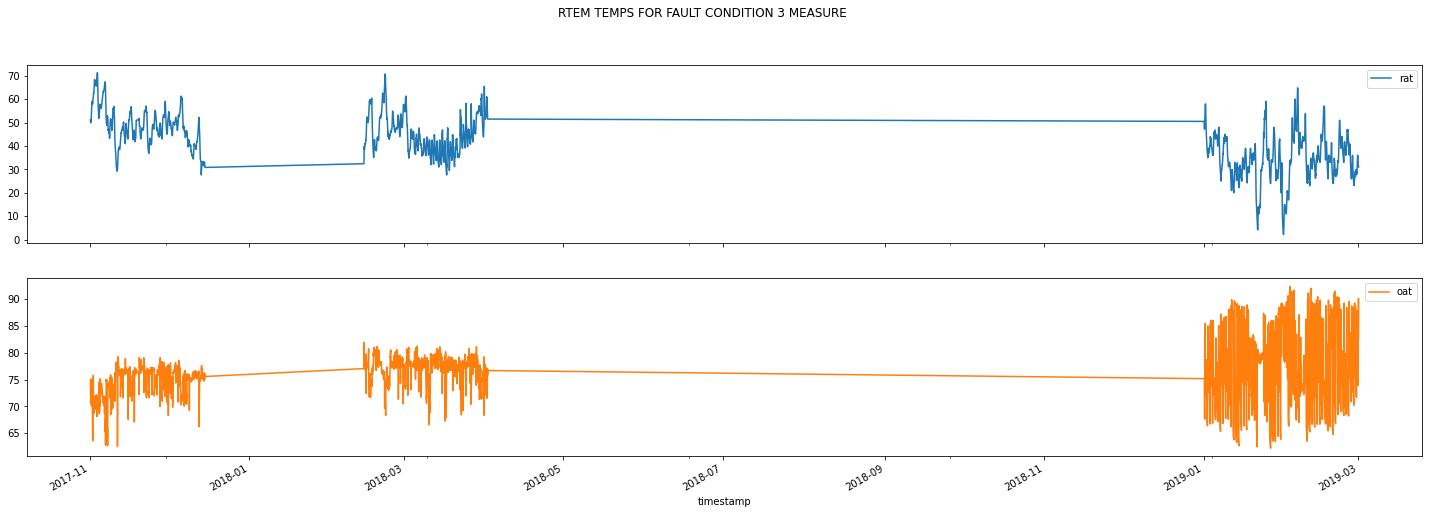

In [61]:
rtem_temps_avg.plot(figsize=(25,8), subplots=True, title='RTEM TEMPS FOR FAULT CONDITION 3 MEASURE')

In [72]:
supply_fan_delta_degf = 2.
oat_rat_delta_degf_min = 10.
supply_degf_err_thres = 2.
return_degf_err_thres = 2.
mix_degf_err_thres = 5.
outdoor_degf_err_thres = 5. # local OAT options Vs global OAT sensor
air_flow_percent_thres = .3
vfd_speed_percent_err_thres = .05
vfd_speed_percent_max = .99
duct_static_inches_err_thres = .1
delta_os_max = 7.
mode_delay = 30.
alarm_dely = 30.
test_mode_delay = 120.
delta_temperature = 6

In [73]:
# make an entire column out of these params in the Pandas Dataframe
rtem_temps_avg['mix_degf_err_thres'] = mix_degf_err_thres
rtem_temps_avg['supply_degf_err_thres'] = supply_degf_err_thres

In [74]:
rtem_temps_avg.columns

Index(['rat', 'oat', 'mix_degf_err_thres', 'supply_degf_err_thres'], dtype='object')

In [75]:
# Create a debug dataframe for later
rtem_temps_debug =  rtem_temps_avg.copy()

In [76]:
def fault_condition_three_(dataframe):
    return (abs(dataframe.rat - dataframe.oat) >= delta_temperature)

In [77]:
def fault_condition_five_(dataframe):
    return (abs(dataframe.rat - dataframe.oat) >= delta_temperature) and

In [78]:
import numpy as np

rtem_temps_avg['fc5_flag'] = fault_condition_five_(rtem_temps_avg)

In [79]:
rtem_temps_avg['fc5_flag'].value_counts()

True     13983
False      240
Name: fc5_flag, dtype: int64

In [80]:
rtem_temps_avg.columns

Index(['rat', 'oat', 'mix_degf_err_thres', 'supply_degf_err_thres',
       'fc5_flag'],
      dtype='object')

In [81]:
# change boolean column to int for plots

rtem_temps_avg['fc5_flag'] = rtem_temps_avg['fc5_flag'].astype(int)

# drop params column for better plot
rtem_temps_avg = rtem_temps_avg.drop(['supply_degf_err_thres',
                  'mix_degf_err_thres'],axis=1)

In [82]:
fdd_plot = rtem_temps_avg

In [83]:
fdd_plot.columns

Index(['rat', 'oat', 'fc5_flag'], dtype='object')

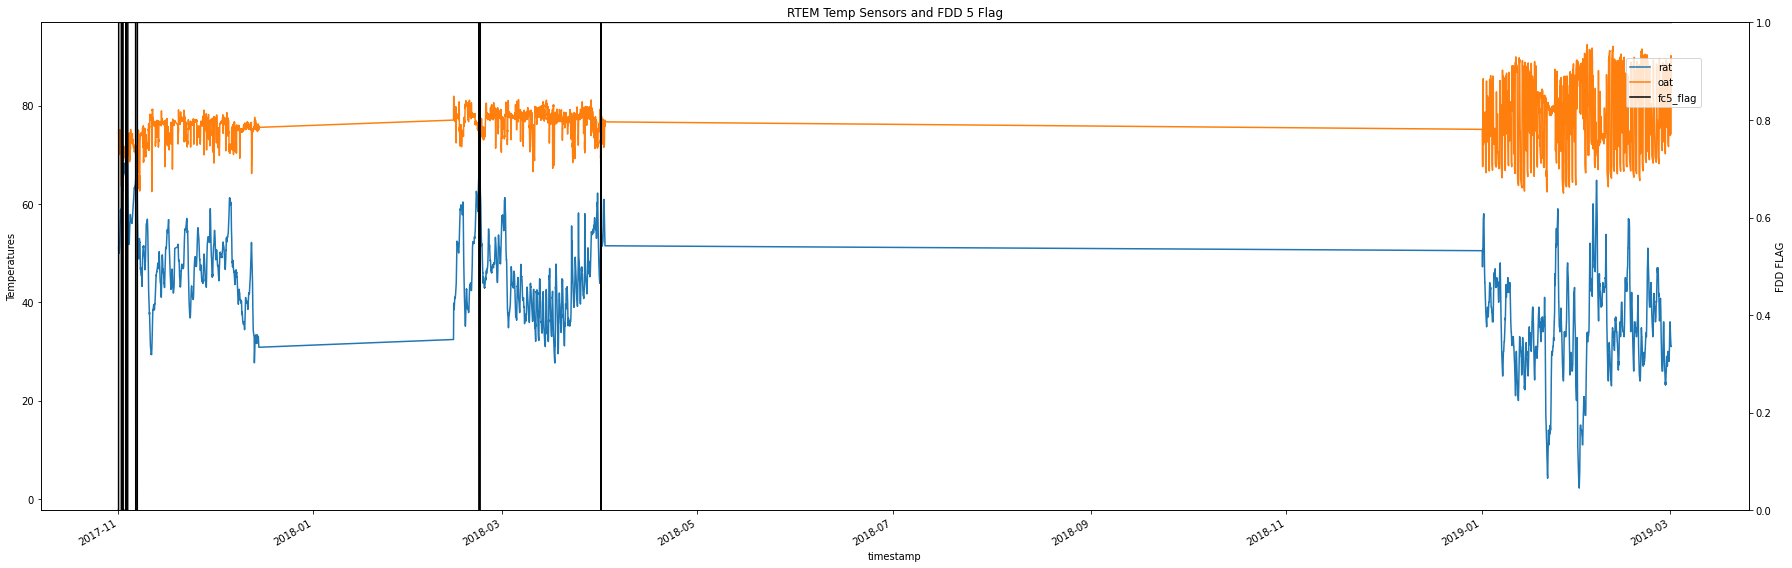

In [86]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(25,8))

plot1a = fdd_plot.rat.plot(ax=ax)
plot1b = fdd_plot.oat.plot(ax=ax)
plot1d = fdd_plot.fc5_flag.plot(ax=ax, color='k', secondary_y=True)

ax.set_ylabel('Temperatures')
ax.right_ax.set_ylim(0,1)
plt.ylabel('FDD FLAG')

ax.set_title("RTEM Temp Sensors and FDD 5 Flag")
fig.legend(['rat','oat','fc5_flag'],bbox_to_anchor=(.95, .9))

# defining display layout
plt.tight_layout()

# show plot
plt.show()

# Plotting

## Lineplots

We are going to explore our sensors data with some simple lineplots. We are going to use [*Seaborn*](https://seaborn.pydata.org/) which works on [*Matplotlib*](https://matplotlib.org/stable/users/index.html). Let's import them:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# This is for the visual stype, I like "ggplot"
plt.style.use('ggplot')

# This for the figure size
plt.rcParams["figure.figsize"] = (20,9)

Let's plot the raw data of our sensors:

In [ ]:
# These are the sensors, one per column (first one is the timestamp)
cols = data.columns[1:]
cols

In [ ]:
for col in cols:
    plt.figure()
    sns.lineplot(data=data, x="timestamp", y=col)

We have a huge gap with no data and the rest it's noisy and difficult to see. Let's filter data from september 1st 2017:

In [ ]:
data = data[data.timestamp >= "2017-09-01"]

One useful technique to deal with noisy data is to resample it by hour (or a longer time frequency) aggregating by the mean: this way we can visualize the hourly/daily behaviour more smoothed.

But first, let's go deeper into our `timestamp` column. This is a datetime column, meaning that we have some functions to handle the dates better. With [this pandas method](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.html) we can access our date: we can get the date, the weekday, the hour, the seconds, the minutes; all the information in our date can be obtained.

Let's try an example. This is our raw timestamp:

In [ ]:
data.timestamp

We can get the date:

In [ ]:
data.timestamp.dt.date

Even the he day of the week (with Monday=0, Sunday=6)

In [ ]:
data.timestamp.dt.weekday

The hour

In [ ]:
data.timestamp.dt.hour

Or the minutes

In [ ]:
data.timestamp.dt.minute

Pretty simple! You have all the datetime information handy.

Now let's smooth the data to plot it!

In [ ]:
data_hour = data.resample('1H', on="timestamp").mean()
data_hour.head()

And we have the mean temperature by hour! Plotting it is simple with this data set:

In [ ]:
fig = sns.lineplot(data=data_hour)

# This is just for hiding the legend for now, there are a lot of labels and is difficult to see the plot
plt.legend([],[], frameon=False)

Let's do it again but daily:

In [ ]:
data_day = data.resample('24H', on="timestamp").mean()
data_day.head()

In [ ]:
sns.lineplot(data=data_day)

# This is just for hiding the legend for now, there are a lot of labels and is difficult to see the plot
plt.legend([],[], frameon=False)

## Heatmaps

Lineplots are easy but still pretty diffcult to visualize. Instead, we can use [heatmaps](https://seaborn.pydata.org/generated/seaborn.heatmap.html), it's also really easy. Remember you can transpose your data to change the axis, like this:

In [ ]:
data_hour.T

And super-easy to plot:

In [ ]:
sns.heatmap(data_hour.T, cmap="hot_r")

In [ ]:
sns.heatmap(data_day.T, cmap="hot_r")

With this kind of plot is pretty evident where we have gaps with no-readings.

# Summary stats

Usually is useful to get some summary stats from our data. Fortunately, pandas has a simple method to obtain them:

In [ ]:
data.describe()

These stats are usually visualizes in boxplot and histograms; these two plots can be easily obtained with the plotting libraries we are using. But first I suggest processing a little the dataframe to be able to plot all sensors in the same figure. We are using the pandas method [melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html). We have the data in this way right now:

In [ ]:
data.head()

If we use the `melt` method we can convert our columns in rows, creating a new one that indicates which column it was. Is easier seeing the results, check it out:

In [ ]:
melted_data = data.melt(id_vars="timestamp", var_name="sensor", value_name="temperature")
melted_data

And now that we have the data in this shape, is easy to get a boxplot:

In [ ]:
fig = sns.boxplot(y="temperature", x="sensor", data=melted_data)
labels = plt.xticks(rotation=90)

We can also plot an histogram, but with this number of sensors a boxplot is cleaner:

In [ ]:
fig = sns.histplot(data=melted_data, x="temperature", hue="sensor", bins=20, kde=True, palette="Dark2")

# This is just for hiding the legend for now, there are a lot of labels and is difficult to see the plot
plt.legend([],[], frameon=False)

Finally, let's create a dataset with the stats. 

In [ ]:
stats_data = data.describe()
stats_data

We are transposing it and reseting the index to keep a column with the point id (was the name of the column):

In [ ]:
stats_data = stats_data.T.reset_index().rename(columns={"index":"id_point"})
stats_data

And now let's convert the `id_point` column in our metadata set to string (is an int right now) so we are able to merge with `stats_data`:

In [ ]:
metadata['id_point'] = metadata['id_point'].astype(str)

And merge!

In [ ]:
stats_merged = pd.merge(stats_data, metadata, how="left", on="id_point")
stats_merged.head()

In [ ]:
metadata.T

Finally, plot! we want to visualize the mean temperature of the points, colored by the building name.

In [ ]:
fig = sns.barplot(data=stats_merged, x="id_point", y="mean", hue="name_bdg", dodge=False)
labels = plt.xticks(rotation=90)